## --로지스틱 회귀 가설함수 식 예시


$$h_{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}}$$


$${\theta^Tx}는  선형회귀식  ({\theta}0+{\theta}1 * x )을 나타낸다$$

LaTex 문법을 공부하면 마크다운을 이용해서 수식을 작성할 수 있다. 
지금은 뭔지 하나도 모르겠다.

## -- 로그 손실 예시

실제 값이 1일 때 로지스틱 손실 함수는 다음과 같이 줄어듭니다. (y^은 예측값 y는 실제값)


L(1,y^ )=−log(y^ )


실제 값이 0이면 다음과 같이 됩니다.


L(0,y^ )=−log(1−y^ )

### -- 로그 손실 한 줄 식

## $$L(y,\hat{y})=−ylog(\hat{y} )−(1−y)log(1−\hat{y})$$

- 위에 두 식을 그래프로 그려보면 x =1/2 위치에서 y축 대칭이 된다.

- 로그 손실. 로그 함수를 이용해서 손실을 구한다.

In [1]:
#!pip install IPython 
#이미지 불러올 패키지 다운받기
from IPython.display import Image  

## 로그손실 그래프

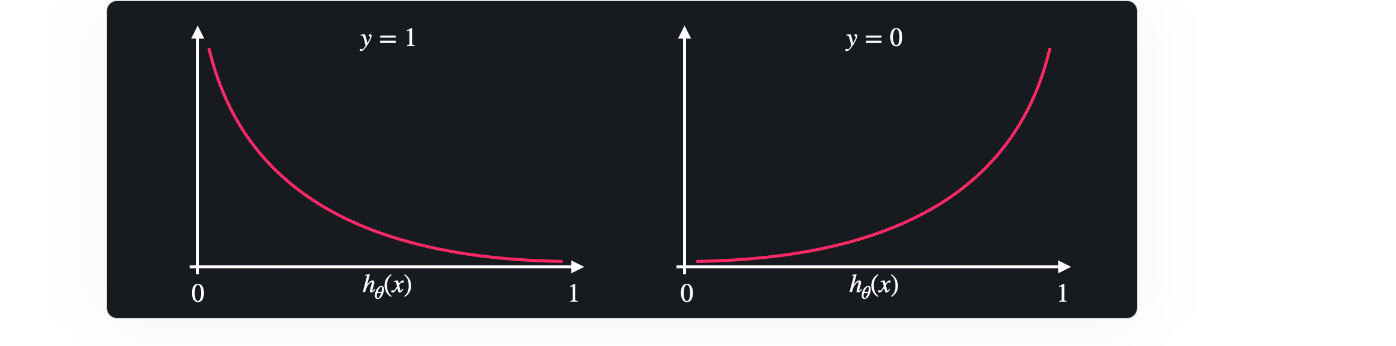

In [2]:
Image('C:\\Users\\82109\\Documents\\ds_study\\머신러닝\\로그손실함수.png')

로지스틱 손실 함수의 합계

## $$ L(y,\hat{y}) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)$$

경사하강법 (로지스틱, 선형회귀 동일)

## $$\theta_{j} = \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta) = \theta_{j} - \alpha \frac{1}{m } \sum_{i=1}^m (\hat{y}i - y_i) x_{ij}$$



## 코드로 구현해보기

X는 입력변수 m * n 행렬 


theta는  파라미터 n * 1 벡터


(X @ theta)는 m * 1 벡터

In [3]:
import numpy as np


## x 의 위치에는 (X@ theta)입력변수 벡터가 들어가고 결과로는 (가설함수 벡터 = 확률값 벡터)가 나온다.
# 로지스틱 가설함수 식과 일치함을 알 수 있다. 다만 여기선 가설함수 식이 주르륵 나오는 가설함수 벡터 형태로 후에 출력된다.
def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))
    

# x@ theta의 내적값이 가설함수의 입력값으로 들어간다.
# X는 입력변수 행렬 theta는 파라미터 벡터

def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    # 여기에 코드를 작성하세요
    return sigmoid(X @ theta)


##### 입력변수를 행렬로 만든다

In [5]:
# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 설계 행렬 X 정의
# 전치 시켜야 내적이 가능하다.
# 로지스틱 회귀의 입력변수에는  np.ones() 를 넣어준다. 
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

print(X.shape)

(16, 4)


##### 여기서 theta는 아직 경사하강법을 배우는 목적이 아니기에 임의로 설정되었지만, 
###### 실제로는 gradient descent와 같은 방법으로 손실을 최소화하는 방향으로 
###### theta값들을 업데이트해서 theta(0,1,2,3,4,...)값들을 알아낸다.

In [7]:
# 파라미터 theta 정의
theta = [0.5, 0.3, -2, 0.2] 

In [8]:
(X.T.shape)

(4, 16)

###### 시험에 통과할 확률 벡터가 나온다

In [9]:
prediction(X, theta)

array([0.26114999, 0.28699984, 0.37989357, 0.39174097, 0.57199613,
       0.55971365, 0.59868766, 0.54735762, 0.72312181, 0.80218389,
       0.86989153, 0.87653295, 0.85814894, 0.91293423, 0.86989153,
       0.9289057 ])